In [1]:
from futile import YamlIO as Y
from futile.Utils import ensure_dir, write
from BigDFT import Calculators as C
from BigDFT import Logfiles as lf
from BigDFT import Inputfiles as I,InputActions as A

import constants as const
import plotting_wrappers
import excited_states
import utilities as utils

import shutil
import os
import numpy as np
import pandas as pd
from IPython.display import display
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
print(np.__file__)

/usr/lib/python2.7/dist-packages/numpy/__init__.pyc


In [3]:
Ha2eV = 27.211386245988

In [4]:
log_files = []
for file in os.listdir('.'): 
    if 'log-' in file:
        log_files.append(file)
        
log_files

['log-TXO-TPA_7.2109310796596855_PBE_0.4.yaml',
 'log-TXO-TPA_-1.6683577275741013_PBE_0.4.yaml',
 'log-TXO-TPA_7.2109310796596855_PBE_0.35.yaml',
 'log-TXO-TPA_9.062644582596226_PBE_0.3.yaml',
 'log-TXO-TPA_16.51511897279945_PBE_0.35.yaml',
 'log-TXO-TPA_-1.6683577275741013_PBE_0.6.yaml',
 'log-TXO-TPA_-33.423100855536816_PBE_0.55.yaml',
 'log-TXO-TPA_-12.047381336541143_PBE_0.6.yaml',
 'log-TXO-TPA_16.51511897279945_PBE_0.3.yaml',
 'log-TXO-TPA_15.884234335350673_PBE_0.3.yaml',
 'log-TXO-TPA_24.7415677010914_PBE_0.3.yaml',
 'log-TXO-TPA_8.768191324969473_PBE_0.45.yaml',
 'log-TXO-TPA_7.2109310796596855_PBE_0.55.yaml',
 'log-TXO-TPA_-20.855937904411284_PBE_0.4.yaml',
 'log-TXO-TPA_-5.964725862854614_PBE_0.3.yaml',
 'log-TXO-TPA_-1.6683577275741013_PBE_0.5.yaml',
 'log-TXO-TPA_21.155617632309553_PBE_0.5.yaml',
 'log-TXO-TPA_-8.49348407878991_PBE_0.5.yaml',
 'log-TXO-TPA_21.155617632309553_PBE_0.3.yaml',
 'log-TXO-TPA_-22.040006729557522_PBE_0.3.yaml',
 'log-TXO-TPA_16.51511897279945_PBE

In [5]:
atom_list_Br_I = pkl.load(open("atom_list_Br_I.pkl",'rb'))
# atom_list_Br_I

In [6]:
data = {}
data['Name'] = []
data['hgrid'] = []
# data['log file'] = []
data['HOMO (eV)'] = []
data['LUMO (eV)'] = []
# data_2['LUMO-HOMO'] = []
data['SYBA Score'] = []
data['Force Norm (Hartree/Bohr)'] = []

counter = 0

for log_file in log_files:
    log = lf.Logfile(log_file)
    
    name = log_file[4:-5]
    data['Name'].append(name.split('_')[0])
    
    hgrid = float(log_file.split('_')[-1].replace('.yaml','')) #float(log_file[-9:].replace('_','').replace('.yaml',''))
    data['hgrid'].append(hgrid)
    
    sybascore = log_file.split('_')[1]
    data['SYBA Score'].append(float(sybascore))
    
    final_gnrm = log.log['Ground State Optimization'][-1]['Hamiltonian Optimization'][-1]\
            ['Subspace Optimization']['Wavefunctions Iterations'][-1]['gnrm']
    target_gnrm = log.log['dft']['gnrm_cv']
    
    if final_gnrm > float(target_gnrm):
        #converged = False
        print log_file, 'WARNING, calculation did not converge'
        
        data['HOMO (eV)'].append(float('nan'))
        data['LUMO (eV)'].append(float('nan'))
        data['Force Norm (Hartree/Bohr)'].append(float('nan'))
        
    else:
        
        tot_electrons = log.log['Total Number of Electrons']
#         tot_orbs = log.log['Total Number of Orbitals'] # this include virtuals
        tot_orbs = tot_electrons / 2
        homo = log.evals[0][0][tot_orbs-1] * Ha2eV
        lumo = log.evals[0][0][tot_orbs] * Ha2eV  
        
        data['HOMO (eV)'].append(homo)
        data['LUMO (eV)'].append(lumo)
        data['Force Norm (Hartree/Bohr)'].append(log.log['Force Norm (Hartree/Bohr)'])

#             data_2['Name'].append(name)
#             data_2['log file'].append(file[1])
            
#             tot_electrons = log.log['Total Number of Electrons']
#         #     tot_orbs = log.log['Total Number of Orbitals'] # this include virtuals
#             tot_orbs = tot_electrons / 2
#             homo = log.evals[0][0][tot_orbs-1] * Ha2eV
#             lumo = log.evals[0][0][tot_orbs] * Ha2eV
            
            
#             data_2['HOMO'].append(homo)
#             data_2['LUMO'].append(lumo)
#             data_2['LUMO-HOMO'].append(lumo-homo)
#             data_2['SYBA Score'].append(float(file[1][(5+len(name)):-9]))
#             data_2['Force'].append(log.log['Force Norm (Hartree/Bohr)'])

    if counter > 126:
        break
        
    counter = counter + 1
#     print counter

In [7]:
df = pd.DataFrame(data)
df

Force Norm (Hartree/Bohr)  HOMO (eV)  LUMO (eV)     Name  SYBA Score  \
0                     0.028206  -6.223759  -3.372513  TXO-TPA    7.210931   
1                     0.072559  -6.983280  -2.981467  TXO-TPA   -1.668358   
2                     0.028074  -6.222153  -3.369702  TXO-TPA    7.210931   
3                     0.058505  -5.782161  -3.245449  TXO-TPA    9.062645   
4                     0.069261  -5.776865  -3.718878  TXO-TPA   16.515119   
5                     0.070679  -6.966058  -2.978238  TXO-TPA   -1.668358   
6                     0.053378  -5.816267  -3.410014  TXO-TPA  -33.423101   
7                     0.179081  -5.681777  -3.207989  TXO-TPA  -12.047381   
8                     0.069317  -5.777049  -3.718411  TXO-TPA   16.515119   
9                     0.051381  -5.888069  -3.225988  TXO-TPA   15.884234   
10                    0.047581  -6.176981  -3.406219  TXO-TPA   24.741568   
11                    0.039618  -5.097344  -3.485257  TXO-TPA    8.768191   
12                    0.027805  -6.217022  -3.385391  TXO-TPA    7.210931   
13                    0.058223  -5.953839  -3.415734  TXO-TPA  -20.855938   
14                    0.059818  -5.734258  -3.480127  TXO-TPA   -5.964726   
15                    0.072191  -6.985032  -2.979737  TXO-TPA   -1.668358   
16                    0.037896  -5.528749  -3.578816  TXO-TPA   21.155618   
17                    0.033335  -5.705154  -3.236380  TXO-TPA   -8.493484   
18                    0.038408  -5.523466  -3.573487  TXO-TPA   21.155618   
19                    0.048184  -5.740701  -3.211833  TXO-TPA  -22.040007   
20                    0.070730  -5.773394  -3.718673  TXO-TPA   16.515119   
21                    0.055611  -6.223295  -3.294224  TXO-TPA   25.408465   
22                    0.028149  -6.224872  -3.374714  TXO-TPA    7.210931   
23                    0.048098  -5.675046  -3.225233  TXO-TPA   15.629532   
24                    0.038338  -5.527903  -3.578705  TXO-TPA   21.155618   
25                    0.071105  -5.887395  -3.219119  TXO-TPA   15.884234   
26                    0.072715  -6.983311  -2.981855  TXO-TPA   -1.668358   
27                    0.058597  -5.742124  -3.208453  TXO-TPA  -22.040007   
28                    0.039871  -5.096643  -3.485066  TXO-TPA    8.768191   
29                    0.045886  -5.814815  -3.406893  TXO-TPA  -33.423101   
..                         ...        ...        ...      ...         ...   
98                    0.028133  -6.220955  -3.367921  TXO-TPA    7.210931   
99                    0.039491  -5.095704  -3.482599  TXO-TPA    8.768191   
100                   0.058259  -5.787265  -3.252075  TXO-TPA    9.062645   
101                   0.072944  -5.724255  -3.231245  TXO-TPA   -8.493484   
102                   0.048457  -5.101871  -3.481614  TXO-TPA    8.768191   
103                   0.069265  -5.776627  -3.719519  TXO-TPA   16.515119   
104                   0.151641  -5.764916  -3.715252  TXO-TPA   16.515119   
105                   0.174809  -5.894884  -3.215947  TXO-TPA   15.884234   
106                   0.069438  -5.775102  -3.718878  TXO-TPA   16.515119   
107                   0.078997  -5.676055  -3.220655  TXO-TPA   15.629532   
108                   0.039491  -5.097248  -3.484092  TXO-TPA    8.768191   
109                   0.083925  -5.532037  -3.581735  TXO-TPA   21.155618   
110                   0.045976  -5.818737  -3.406391  TXO-TPA  -33.423101   
111                   0.051277  -5.890541  -3.227337  TXO-TPA   15.884234   
112                   0.176540  -5.667934  -3.218126  TXO-TPA   15.629532   
113                   0.055479  -6.223985  -3.294394  TXO-TPA   25.408465   
114                   0.033405  -5.704013  -3.238312  TXO-TPA   -8.493484   
115                   0.040012  -5.693899  -3.236366  TXO-TPA   -8.493484   
116                   0.111257  -5.828990  -3.332309  TXO-TPA  -16.719986   
117                   0.045706  -5.811904  -3.405177  TXO-TPA  -33.423101   
1

In [8]:
df['LUMO-HOMO (eV)'] = df['LUMO (eV)']-df['HOMO (eV)']
df

Force Norm (Hartree/Bohr)  HOMO (eV)  LUMO (eV)     Name  SYBA Score  \
0                     0.028206  -6.223759  -3.372513  TXO-TPA    7.210931   
1                     0.072559  -6.983280  -2.981467  TXO-TPA   -1.668358   
2                     0.028074  -6.222153  -3.369702  TXO-TPA    7.210931   
3                     0.058505  -5.782161  -3.245449  TXO-TPA    9.062645   
4                     0.069261  -5.776865  -3.718878  TXO-TPA   16.515119   
5                     0.070679  -6.966058  -2.978238  TXO-TPA   -1.668358   
6                     0.053378  -5.816267  -3.410014  TXO-TPA  -33.423101   
7                     0.179081  -5.681777  -3.207989  TXO-TPA  -12.047381   
8                     0.069317  -5.777049  -3.718411  TXO-TPA   16.515119   
9                     0.051381  -5.888069  -3.225988  TXO-TPA   15.884234   
10                    0.047581  -6.176981  -3.406219  TXO-TPA   24.741568   
11                    0.039618  -5.097344  -3.485257  TXO-TPA    8.768191   
12                    0.027805  -6.217022  -3.385391  TXO-TPA    7.210931   
13                    0.058223  -5.953839  -3.415734  TXO-TPA  -20.855938   
14                    0.059818  -5.734258  -3.480127  TXO-TPA   -5.964726   
15                    0.072191  -6.985032  -2.979737  TXO-TPA   -1.668358   
16                    0.037896  -5.528749  -3.578816  TXO-TPA   21.155618   
17                    0.033335  -5.705154  -3.236380  TXO-TPA   -8.493484   
18                    0.038408  -5.523466  -3.573487  TXO-TPA   21.155618   
19                    0.048184  -5.740701  -3.211833  TXO-TPA  -22.040007   
20                    0.070730  -5.773394  -3.718673  TXO-TPA   16.515119   
21                    0.055611  -6.223295  -3.294224  TXO-TPA   25.408465   
22                    0.028149  -6.224872  -3.374714  TXO-TPA    7.210931   
23                    0.048098  -5.675046  -3.225233  TXO-TPA   15.629532   
24                    0.038338  -5.527903  -3.578705  TXO-TPA   21.155618   
25                    0.071105  -5.887395  -3.219119  TXO-TPA   15.884234   
26                    0.072715  -6.983311  -2.981855  TXO-TPA   -1.668358   
27                    0.058597  -5.742124  -3.208453  TXO-TPA  -22.040007   
28                    0.039871  -5.096643  -3.485066  TXO-TPA    8.768191   
29                    0.045886  -5.814815  -3.406893  TXO-TPA  -33.423101   
..                         ...        ...        ...      ...         ...   
98                    0.028133  -6.220955  -3.367921  TXO-TPA    7.210931   
99                    0.039491  -5.095704  -3.482599  TXO-TPA    8.768191   
100                   0.058259  -5.787265  -3.252075  TXO-TPA    9.062645   
101                   0.072944  -5.724255  -3.231245  TXO-TPA   -8.493484   
102                   0.048457  -5.101871  -3.481614  TXO-TPA    8.768191   
103                   0.069265  -5.776627  -3.719519  TXO-TPA   16.515119   
104                   0.151641  -5.764916  -3.715252  TXO-TPA   16.515119   
105                   0.174809  -5.894884  -3.215947  TXO-TPA   15.884234   
106                   0.069438  -5.775102  -3.718878  TXO-TPA   16.515119   
107                   0.078997  -5.676055  -3.220655  TXO-TPA   15.629532   
108                   0.039491  -5.097248  -3.484092  TXO-TPA    8.768191   
109                   0.083925  -5.532037  -3.581735  TXO-TPA   21.155618   
110                   0.045976  -5.818737  -3.406391  TXO-TPA  -33.423101   
111                   0.051277  -5.890541  -3.227337  TXO-TPA   15.884234   
112                   0.176540  -5.667934  -3.218126  TXO-TPA   15.629532   
113                   0.055479  -6.223985  -3.294394  TXO-TPA   25.408465   
114                   0.033405  -5.704013  -3.238312  TXO-TPA   -8.493484   
115                   0.040012  -5.693899  -3.236366  TXO-TPA   -8.493484   
116                   0.111257  -5.828990  -3.332309  TXO-TPA  -16.719986   
117                   0.045706  -5.811904  -3.405177  TXO-TPA  -33.423101   
1

In [9]:
# df_sorted = df.sort(['hgrid','Name','SYBA Score'], ascending = [True,False,False]).copy()
# df_sorted

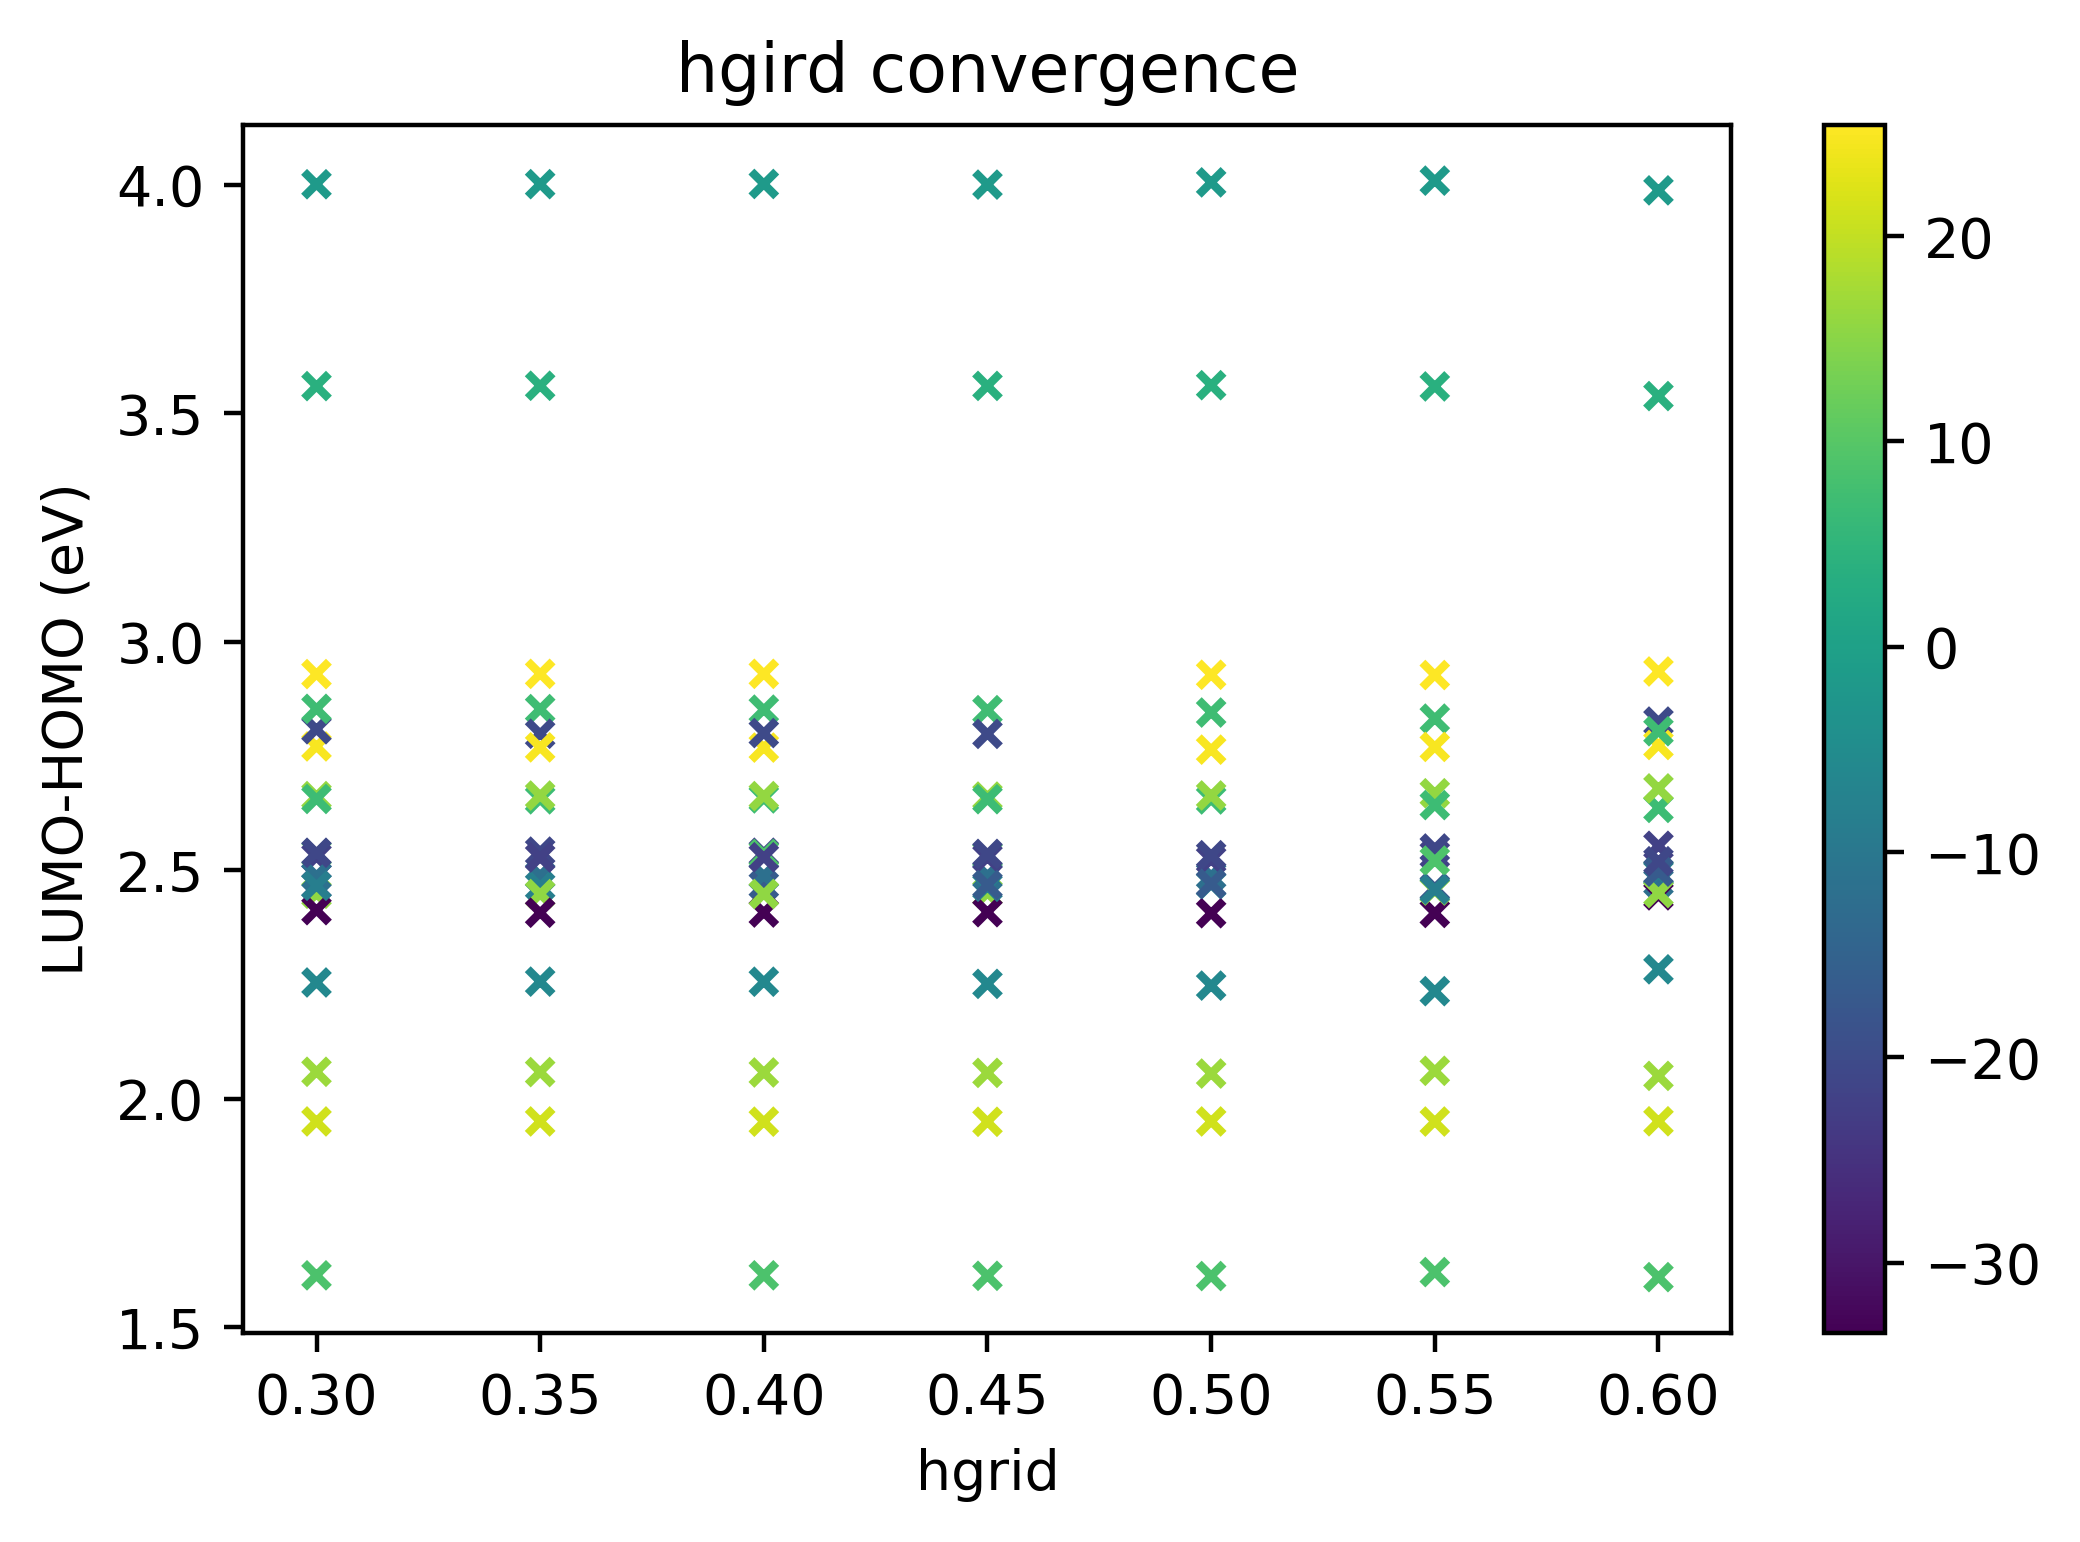

In [10]:
df.plot.scatter(x='hgrid',y='LUMO-HOMO (eV)',marker='x', alpha = 1, c=df['SYBA Score'],cmap="viridis", sharex=False)
plt.title('hgird convergence')

plt.show()

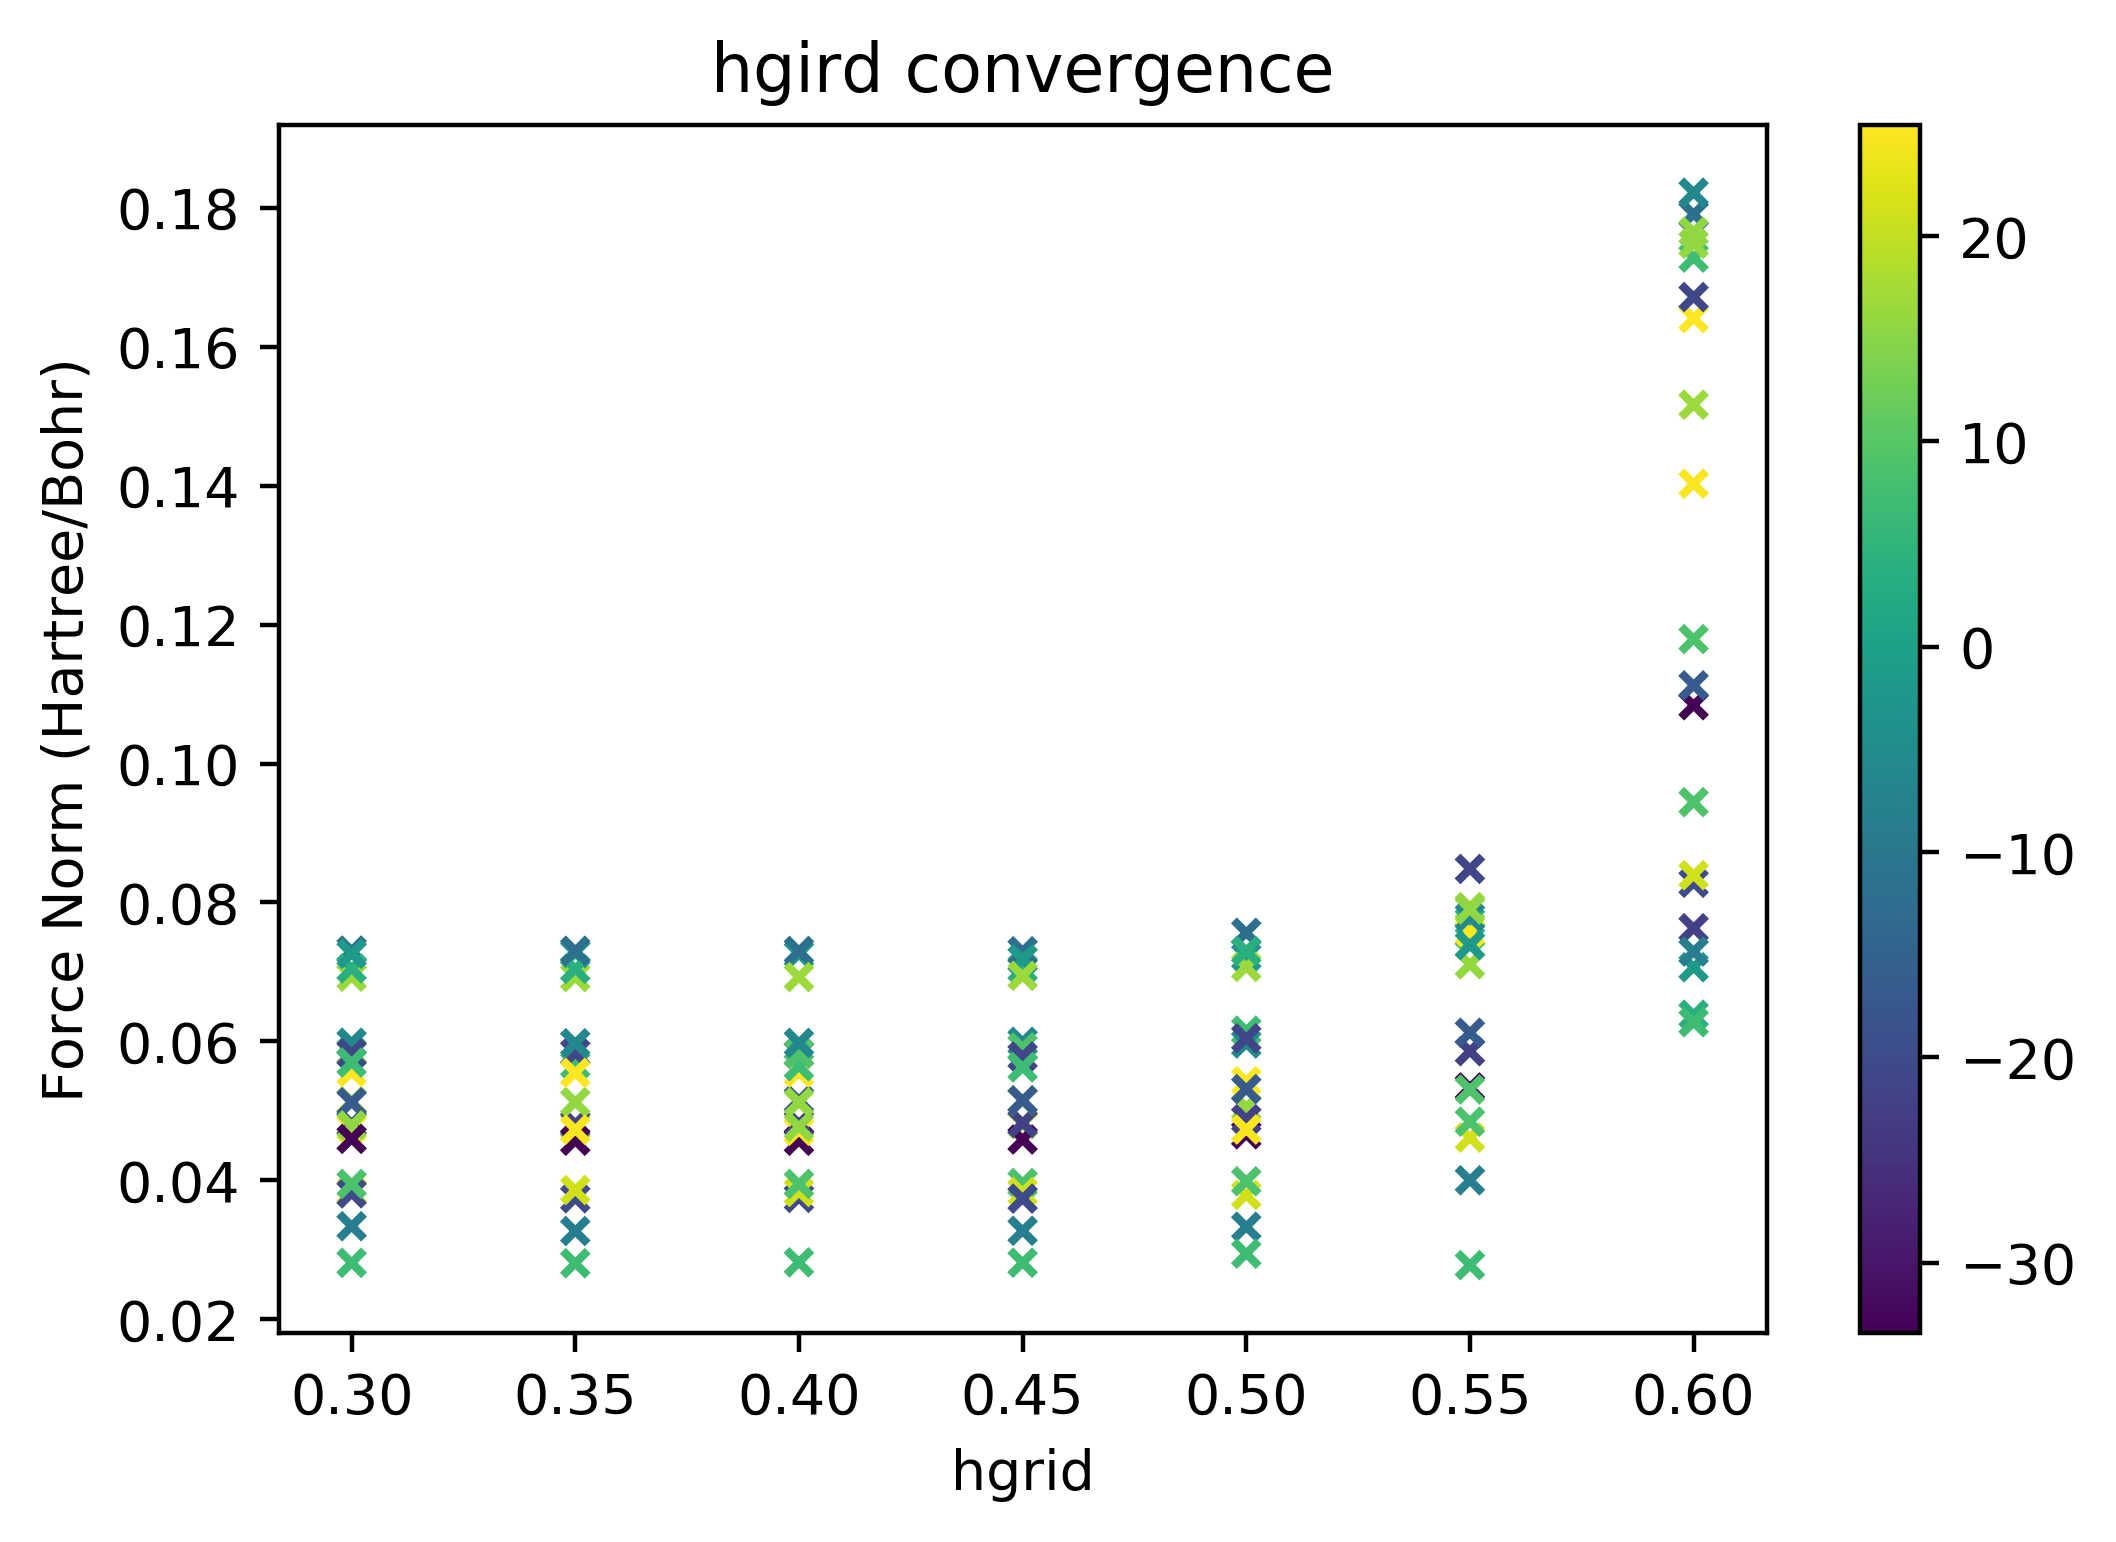

In [11]:
df.plot.scatter('hgrid','Force Norm (Hartree/Bohr)',marker='x',alpha = 1, c=df['SYBA Score'],cmap="viridis",sharex=False)
plt.title('hgird convergence')
plt.show()

In [27]:
df_sorted = df.sort(['SYBA Score','hgrid'],ascending=[True,True]).copy().reset_index().iloc[:,[4,5,6,7,1]]

/usr/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [28]:
df_sorted

Name  SYBA Score  hgrid  LUMO-HOMO (eV)  Force Norm (Hartree/Bohr)
0    TXO-TPA  -33.423101   0.30        2.412346                   0.045976
1    TXO-TPA  -33.423101   0.35        2.406728                   0.045706
2    TXO-TPA  -33.423101   0.40        2.407169                   0.045706
3    TXO-TPA  -33.423101   0.45        2.407922                   0.045886
4    TXO-TPA  -33.423101   0.50        2.405676                   0.046630
5    TXO-TPA  -33.423101   0.55        2.406253                   0.053378
6    TXO-TPA  -33.423101   0.60        2.444736                   0.108395
7    TXO-TPA  -22.040007   0.30        2.528868                   0.048184
8    TXO-TPA  -22.040007   0.35        2.527606                   0.048143
9    TXO-TPA  -22.040007   0.40        2.528260                   0.048192
10   TXO-TPA  -22.040007   0.45        2.527328                   0.048284
11   TXO-TPA  -22.040007   0.50        2.522947                   0.048804
12   TXO-TPA  -22.040007   0.55        2.533670                   0.058597
13   TXO-TPA  -22.040007   0.60        2.553263                   0.076295
14   TXO-TPA  -20.855938   0.30        2.538089                   0.058281
15   TXO-TPA  -20.855938   0.35        2.540543                   0.058353
16   TXO-TPA  -20.855938   0.40        2.538104                   0.058223
17   TXO-TPA  -20.855938   0.45        2.535585                   0.057840
18   TXO-TPA  -20.855938   0.50        2.532699                   0.060462
19   TXO-TPA  -20.855938   0.55        2.547373                   0.084829
20   TXO-TPA  -20.855938   0.60        2.519527                   0.167146
21   TXO-TPA  -20.171528   0.30        2.808336                   0.038133
22   TXO-TPA  -20.171528   0.35        2.798531                   0.037426
23   TXO-TPA  -20.171528   0.40        2.800007                   0.037478
24   TXO-TPA  -20.171528   0.45        2.798175                   0.037382
25   TXO-TPA  -20.171528   0.60        2.825205                   0.082836
26   TXO-TPA  -16.719986   0.30        2.466192                   0.051225
27   TXO-TPA  -16.719986   0.40        2.467171                   0.051570
28   TXO-TPA  -16.719986   0.45        2.467234                   0.051520
29   TXO-TPA  -16.719986   0.50        2.470204                   0.053148
..       ...         ...    ...             ...                        ...
98   TXO-TPA   15.884234   0.45        2.660987                   0.051516
99   TXO-TPA   15.884234   0.50        2.663470                   0.050540
100  TXO-TPA   15.884234   0.55        2.668277                   0.071105
101  TXO-TPA   15.884234   0.60        2.678937                   0.174809
102  TXO-TPA   16.515119   0.30        2.058639                   0.069317
103  TXO-TPA   16.515119   0.35        2.057987                   0.069261
104  TXO-TPA   16.515119   0.40        2.057109                   0.069265
105  TXO-TPA   16.515119   0.45        2.056224                   0.069438
106  TXO-TPA   16.515119   0.50        2.054721                   0.070730
107  TXO-TPA   16.515119   0.55        2.060760                   0.079337
108  TXO-TPA   16.515119   0.60        2.049664                   0.151641
109  TXO-TPA   21.155618   0.30        1.949979                   0.038408
110  TXO-TPA   21.155618   0.35        1.949952                   0.038609
111  TXO-TPA   21.155618   0.40        1.949461                   0.038328
112  TXO-TPA   21.155618   0.45        1.949197                   0.038338
113  TXO-TPA   21.155618   0.50        1.949933                   0.037896
114  TXO-TPA   21.155618   0.55        1.949752                   0.046163
115  TXO-TPA   21.155618   0.60        1.950302                   0.083925
116  TXO-TPA   24.741568   0.30        2.770762                   0.047581
117  TXO-TPA   24.741568   0.35        2.768703                   0.047297
118  TXO-TPA   24.741568   0.40        2.768211                   0.047136
119  TXO-TPA   24.741568   0.50  

In [38]:
rel_HLs = {}
rel_HLs['Rel LUMO-HOMO (eV)'] = []
rel_forces = {}
rel_forces['Rel Force'] = []

for i,HL in enumerate(df_sorted['LUMO-HOMO (eV)']):
    
#     print df_sorted['hgrid'][i]
    
    if df_sorted['hgrid'][i] == 0.3:
        base = df_sorted['LUMO-HOMO (eV)'][i]
        base_f = df_sorted['Force Norm (Hartree/Bohr)'][i]
        
    rel_HL =  abs(base - df_sorted['LUMO-HOMO (eV)'][i])
    rel_HLs['Rel LUMO-HOMO (eV)'].append(rel_HL)
    
    rel_force = abs(base_f - df_sorted['Force Norm (Hartree/Bohr)'][i])
    rel_forces['Rel Force'].append(rel_force)

In [39]:
df_sorted['Absolute Relative LUMO-HOMO (eV)'] = rel_HLs['Rel LUMO-HOMO (eV)']
df_sorted['Absolute Relative Force Norm (Hartree/Bohr)'] = rel_forces['Rel Force']

In [40]:
df_sorted

Name  SYBA Score  hgrid  LUMO-HOMO (eV)  Force Norm (Hartree/Bohr)  \
0    TXO-TPA  -33.423101   0.30        2.412346                   0.045976   
1    TXO-TPA  -33.423101   0.35        2.406728                   0.045706   
2    TXO-TPA  -33.423101   0.40        2.407169                   0.045706   
3    TXO-TPA  -33.423101   0.45        2.407922                   0.045886   
4    TXO-TPA  -33.423101   0.50        2.405676                   0.046630   
5    TXO-TPA  -33.423101   0.55        2.406253                   0.053378   
6    TXO-TPA  -33.423101   0.60        2.444736                   0.108395   
7    TXO-TPA  -22.040007   0.30        2.528868                   0.048184   
8    TXO-TPA  -22.040007   0.35        2.527606                   0.048143   
9    TXO-TPA  -22.040007   0.40        2.528260                   0.048192   
10   TXO-TPA  -22.040007   0.45        2.527328                   0.048284   
11   TXO-TPA  -22.040007   0.50        2.522947                   0.048804   
12   TXO-TPA  -22.040007   0.55        2.533670                   0.058597   
13   TXO-TPA  -22.040007   0.60        2.553263                   0.076295   
14   TXO-TPA  -20.855938   0.30        2.538089                   0.058281   
15   TXO-TPA  -20.855938   0.35        2.540543                   0.058353   
16   TXO-TPA  -20.855938   0.40        2.538104                   0.058223   
17   TXO-TPA  -20.855938   0.45        2.535585                   0.057840   
18   TXO-TPA  -20.855938   0.50        2.532699                   0.060462   
19   TXO-TPA  -20.855938   0.55        2.547373                   0.084829   
20   TXO-TPA  -20.855938   0.60        2.519527                   0.167146   
21   TXO-TPA  -20.171528   0.30        2.808336                   0.038133   
22   TXO-TPA  -20.171528   0.35        2.798531                   0.037426   
23   TXO-TPA  -20.171528   0.40        2.800007                   0.037478   
24   TXO-TPA  -20.171528   0.45        2.798175                   0.037382   
25   TXO-TPA  -20.171528   0.60        2.825205                   0.082836   
26   TXO-TPA  -16.719986   0.30        2.466192                   0.051225   
27   TXO-TPA  -16.719986   0.40        2.467171                   0.051570   
28   TXO-TPA  -16.719986   0.45        2.467234                   0.051520   
29   TXO-TPA  -16.719986   0.50        2.470204                   0.053148   
..       ...         ...    ...             ...                        ...   
98   TXO-TPA   15.884234   0.45        2.660987                   0.051516   
99   TXO-TPA   15.884234   0.50        2.663470                   0.050540   
100  TXO-TPA   15.884234   0.55        2.668277                   0.071105   
101  TXO-TPA   15.884234   0.60        2.678937                   0.174809   
102  TXO-TPA   16.515119   0.30        2.058639                   0.069317   
103  TXO-TPA   16.515119   0.35        2.057987                   0.069261   
104  TXO-TPA   16.515119   0.40        2.057109                   0.069265   
105  TXO-TPA   16.515119   0.45        2.056224                   0.069438   
106  TXO-TPA   16.515119   0.50        2.054721                   0.070730   
107  TXO-TPA   16.515119   0.55        2.060760                   0.079337   
108  TXO-TPA   16.515119   0.60        2.049664                   0.151641   
109  TXO-TPA   21.155618   0.30        1.949979                   0.038408   
110  TXO-TPA   21.155618   0.35        1.949952                   0.038609   
111  TXO-TPA   21.155618   0.40        1.949461                   0.038328   
112  TXO-TPA   21.155618   0.45        1.949197                   0.038338   
113  TXO-TPA   21.155618   0.50        1.949933                   0.037896   
114  TXO-TPA   21.155618   0.55        1.949752                   0.046163   
115  TXO-TPA   21.155618   0.60        1.950302                   0.083925   
116  TXO-TPA   24.741568   0.30        2.770762                   0.047581   
117  TXO-TPA   24.741568   0.3

In [56]:
df_final = df_sorted[(df_sorted != 0).all(1)]
df_final

Name  SYBA Score  hgrid  LUMO-HOMO (eV)  Force Norm (Hartree/Bohr)  \
1    TXO-TPA  -33.423101   0.35        2.406728                   0.045706   
2    TXO-TPA  -33.423101   0.40        2.407169                   0.045706   
3    TXO-TPA  -33.423101   0.45        2.407922                   0.045886   
4    TXO-TPA  -33.423101   0.50        2.405676                   0.046630   
5    TXO-TPA  -33.423101   0.55        2.406253                   0.053378   
6    TXO-TPA  -33.423101   0.60        2.444736                   0.108395   
8    TXO-TPA  -22.040007   0.35        2.527606                   0.048143   
9    TXO-TPA  -22.040007   0.40        2.528260                   0.048192   
10   TXO-TPA  -22.040007   0.45        2.527328                   0.048284   
11   TXO-TPA  -22.040007   0.50        2.522947                   0.048804   
12   TXO-TPA  -22.040007   0.55        2.533670                   0.058597   
13   TXO-TPA  -22.040007   0.60        2.553263                   0.076295   
15   TXO-TPA  -20.855938   0.35        2.540543                   0.058353   
16   TXO-TPA  -20.855938   0.40        2.538104                   0.058223   
17   TXO-TPA  -20.855938   0.45        2.535585                   0.057840   
18   TXO-TPA  -20.855938   0.50        2.532699                   0.060462   
19   TXO-TPA  -20.855938   0.55        2.547373                   0.084829   
20   TXO-TPA  -20.855938   0.60        2.519527                   0.167146   
22   TXO-TPA  -20.171528   0.35        2.798531                   0.037426   
23   TXO-TPA  -20.171528   0.40        2.800007                   0.037478   
24   TXO-TPA  -20.171528   0.45        2.798175                   0.037382   
25   TXO-TPA  -20.171528   0.60        2.825205                   0.082836   
27   TXO-TPA  -16.719986   0.40        2.467171                   0.051570   
28   TXO-TPA  -16.719986   0.45        2.467234                   0.051520   
29   TXO-TPA  -16.719986   0.50        2.470204                   0.053148   
30   TXO-TPA  -16.719986   0.55        2.461200                   0.061253   
31   TXO-TPA  -16.719986   0.60        2.496681                   0.111257   
33   TXO-TPA  -12.047381   0.35        2.488250                   0.073055   
34   TXO-TPA  -12.047381   0.40        2.488178                   0.073025   
35   TXO-TPA  -12.047381   0.45        2.488157                   0.072984   
..       ...         ...    ...             ...                        ...   
93   TXO-TPA   15.629532   0.55        2.455399                   0.078997   
94   TXO-TPA   15.629532   0.60        2.449808                   0.176540   
96   TXO-TPA   15.884234   0.35        2.663205                   0.051277   
97   TXO-TPA   15.884234   0.40        2.662059                   0.051243   
98   TXO-TPA   15.884234   0.45        2.660987                   0.051516   
99   TXO-TPA   15.884234   0.50        2.663470                   0.050540   
100  TXO-TPA   15.884234   0.55        2.668277                   0.071105   
101  TXO-TPA   15.884234   0.60        2.678937                   0.174809   
103  TXO-TPA   16.515119   0.35        2.057987                   0.069261   
104  TXO-TPA   16.515119   0.40        2.057109                   0.069265   
105  TXO-TPA   16.515119   0.45        2.056224                   0.069438   
106  TXO-TPA   16.515119   0.50        2.054721                   0.070730   
107  TXO-TPA   16.515119   0.55        2.060760                   0.079337   
108  TXO-TPA   16.515119   0.60        2.049664                   0.151641   
110  TXO-TPA   21.155618   0.35        1.949952                   0.038609   
111  TXO-TPA   21.155618   0.40        1.949461                   0.038328   
112  TXO-TPA   21.155618   0.45        1.949197                   0.038338   
113  TXO-TPA   21.155618   0.50        1.949933                   0.037896   
114  TXO-TPA   21.155618   0.55        1.949752                   0.046163   
115  TXO-TPA   21.155618   0.6

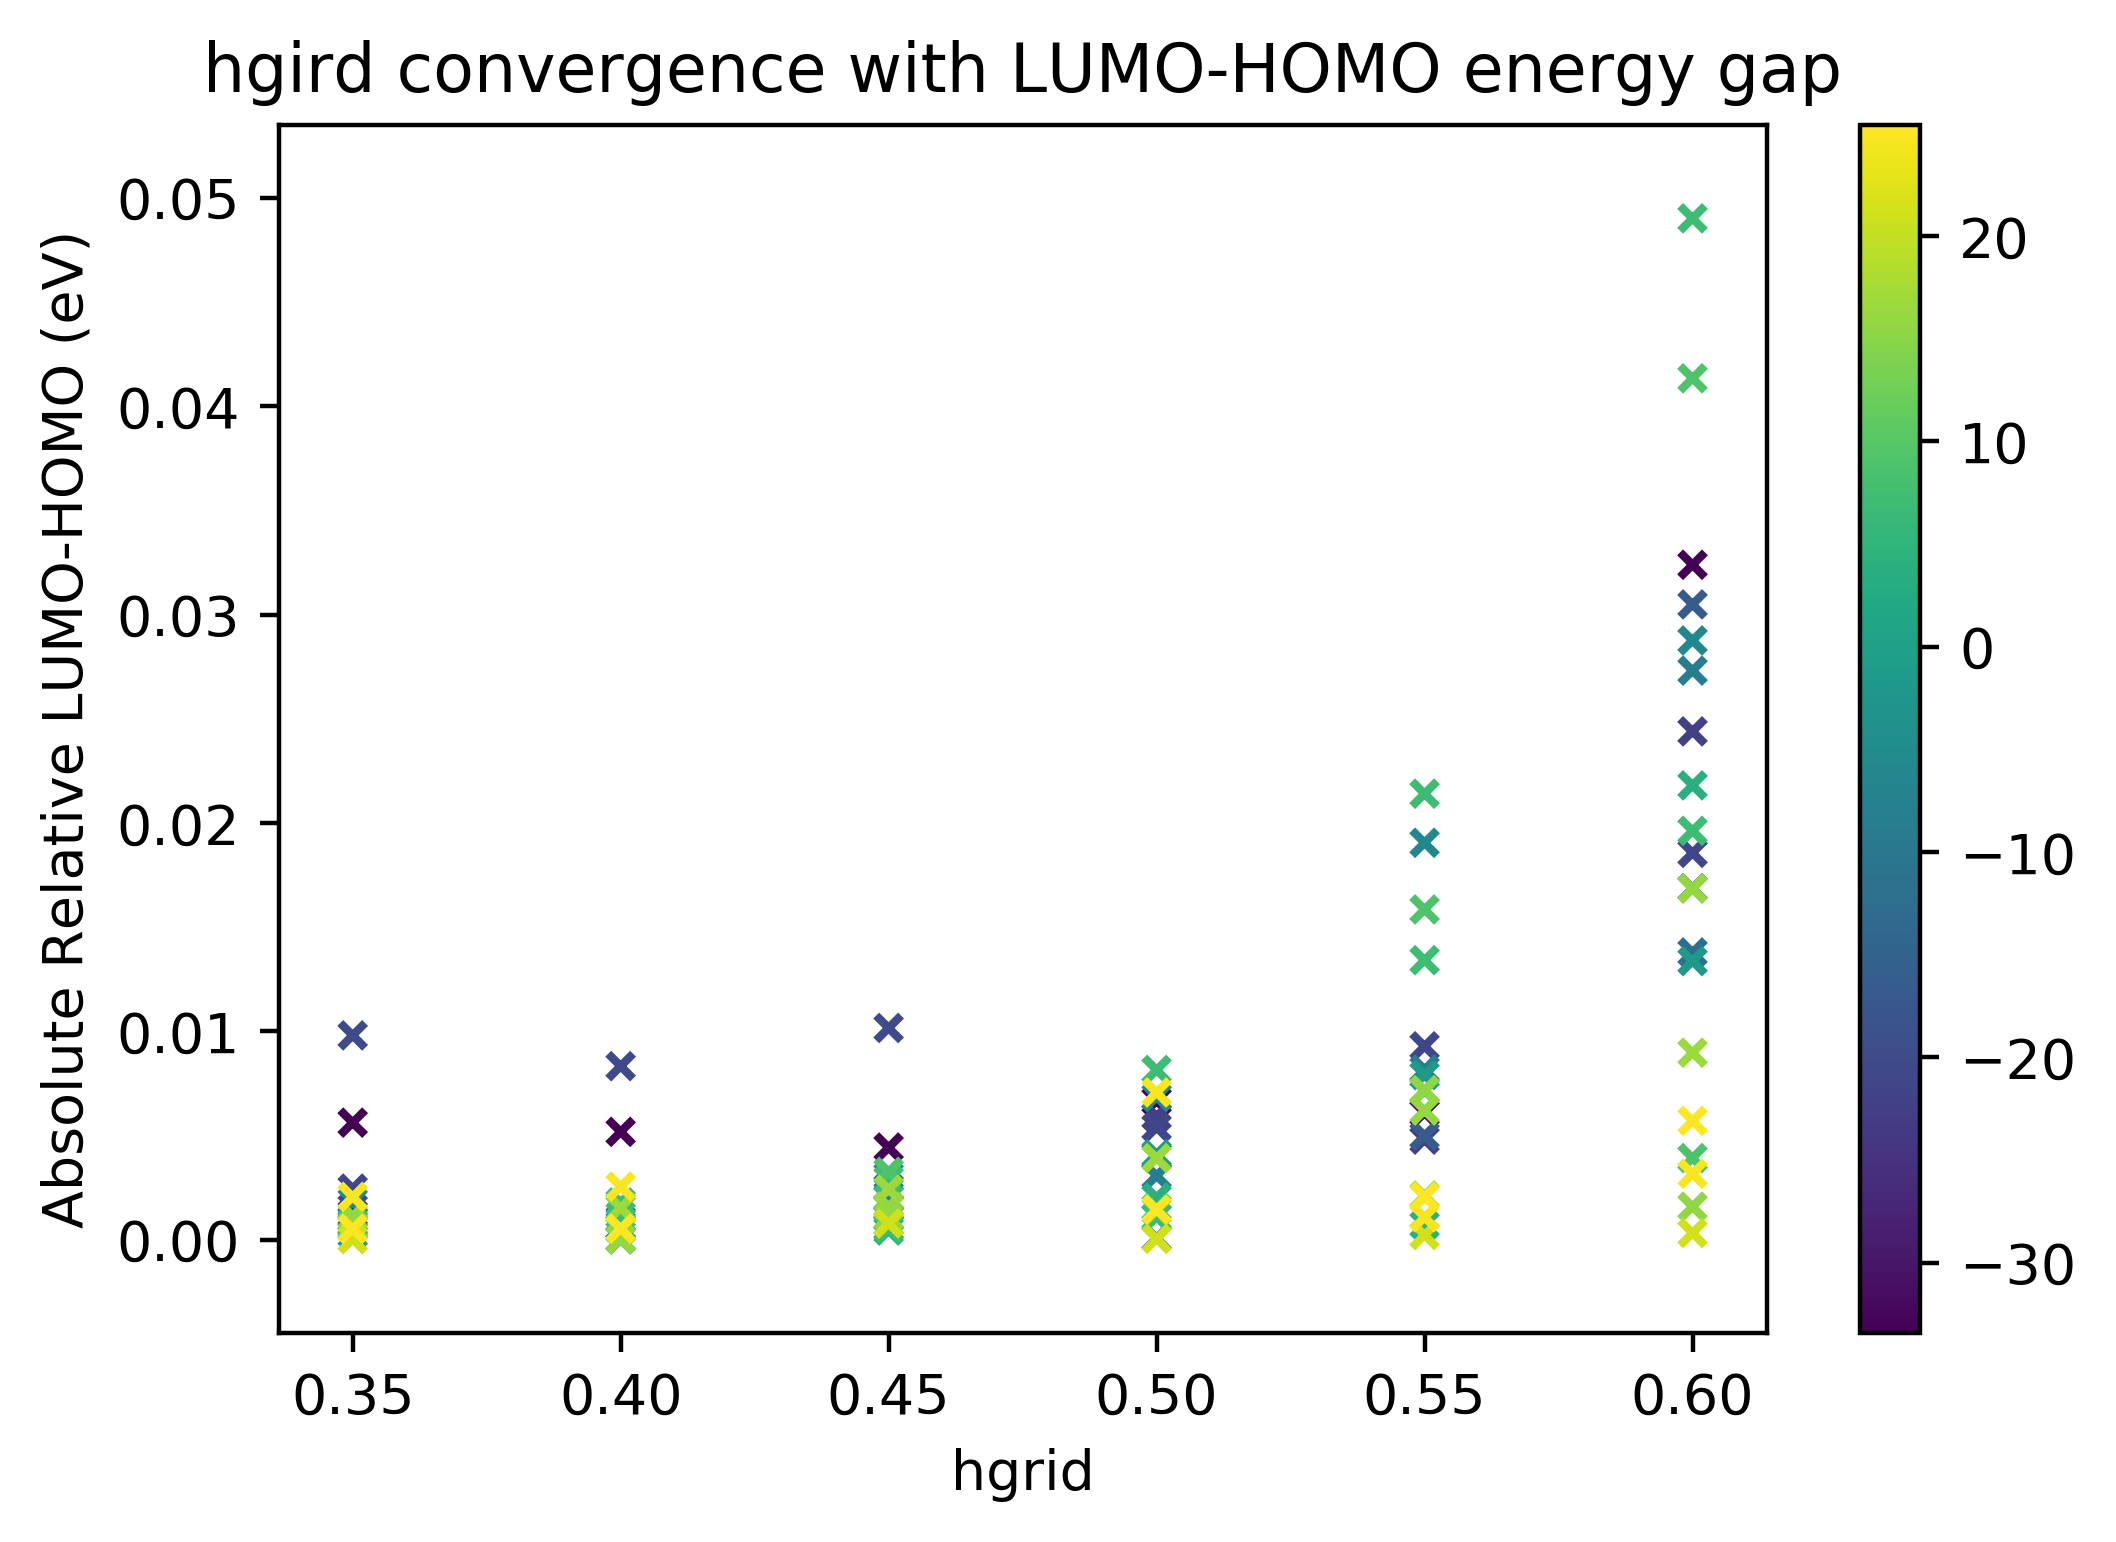

In [76]:
df_final.plot.scatter(x='hgrid',y='Absolute Relative LUMO-HOMO (eV)',marker='x', alpha = 1, c=df_final['SYBA Score'],cmap="viridis", sharex=False)
plt.title('hgird convergence with LUMO-HOMO energy gap')
plt.show()

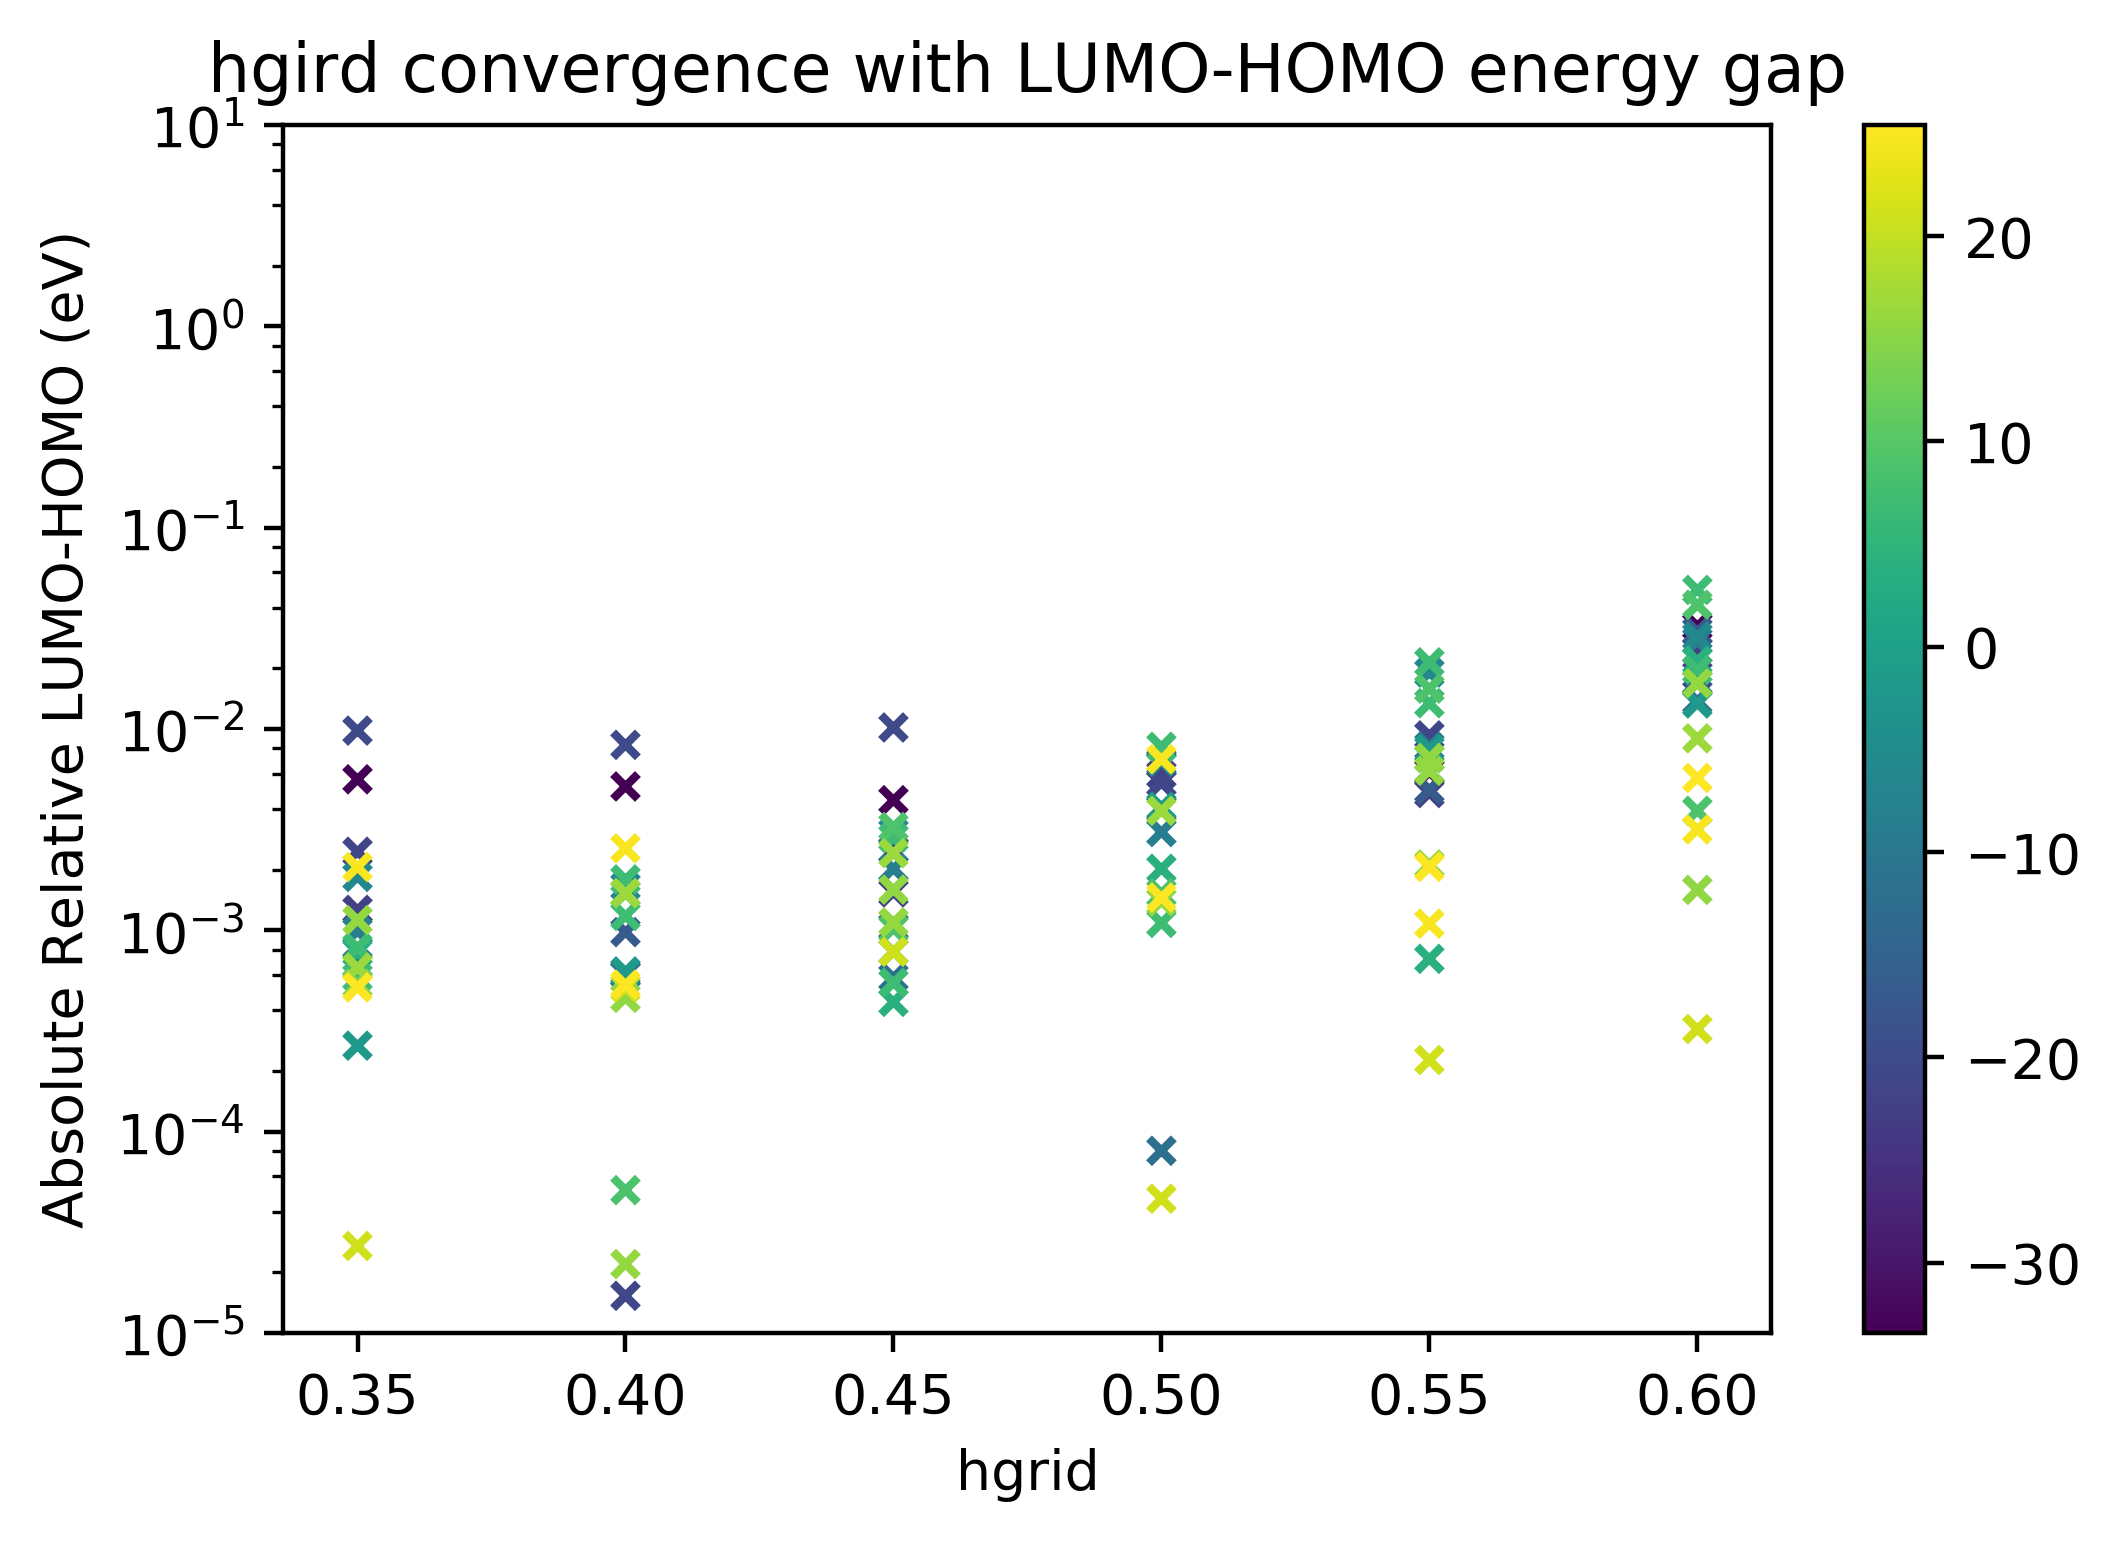

In [74]:
df_final.plot.scatter(x='hgrid',y='Absolute Relative LUMO-HOMO (eV)',marker='x', alpha = 1, c=df_final['SYBA Score'],cmap="viridis", sharex=False)
plt.title('hgird convergence with LUMO-HOMO energy gap')
plt.yscale('log')
plt.ylim(0.00001,10)

plt.show()

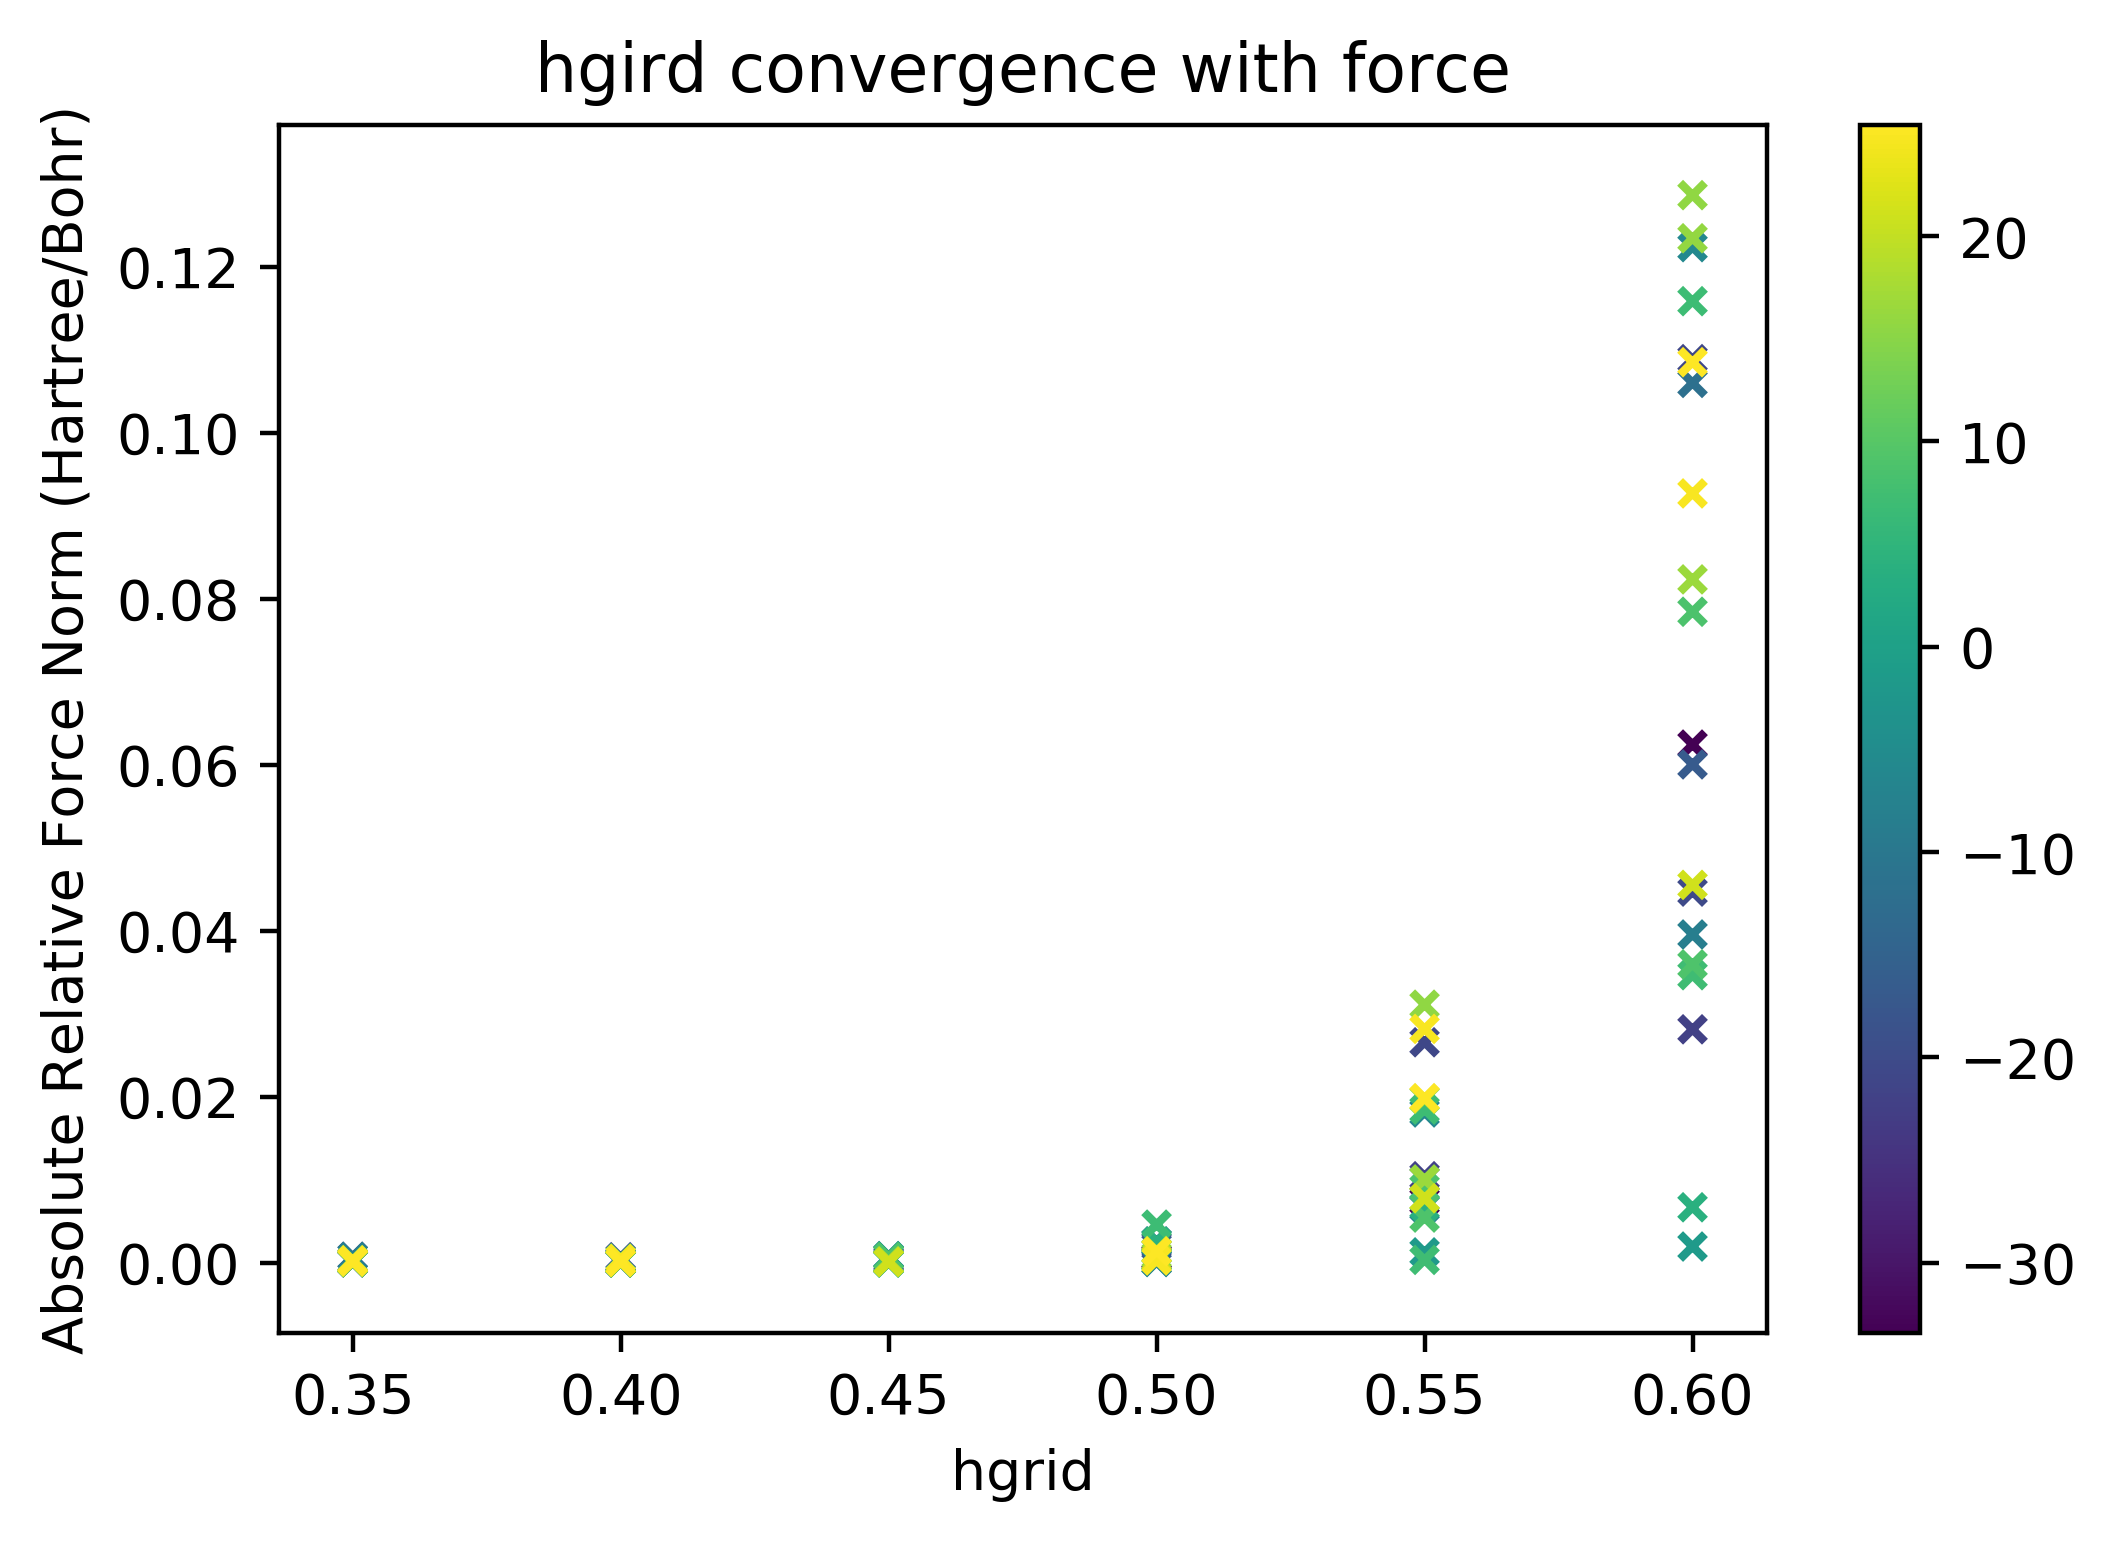

In [75]:
df_final.plot.scatter(x='hgrid',y='Absolute Relative Force Norm (Hartree/Bohr)',marker='x', alpha = 1, c=df_final['SYBA Score'],cmap="viridis", sharex=False)
plt.title('hgird convergence with force')
plt.show()

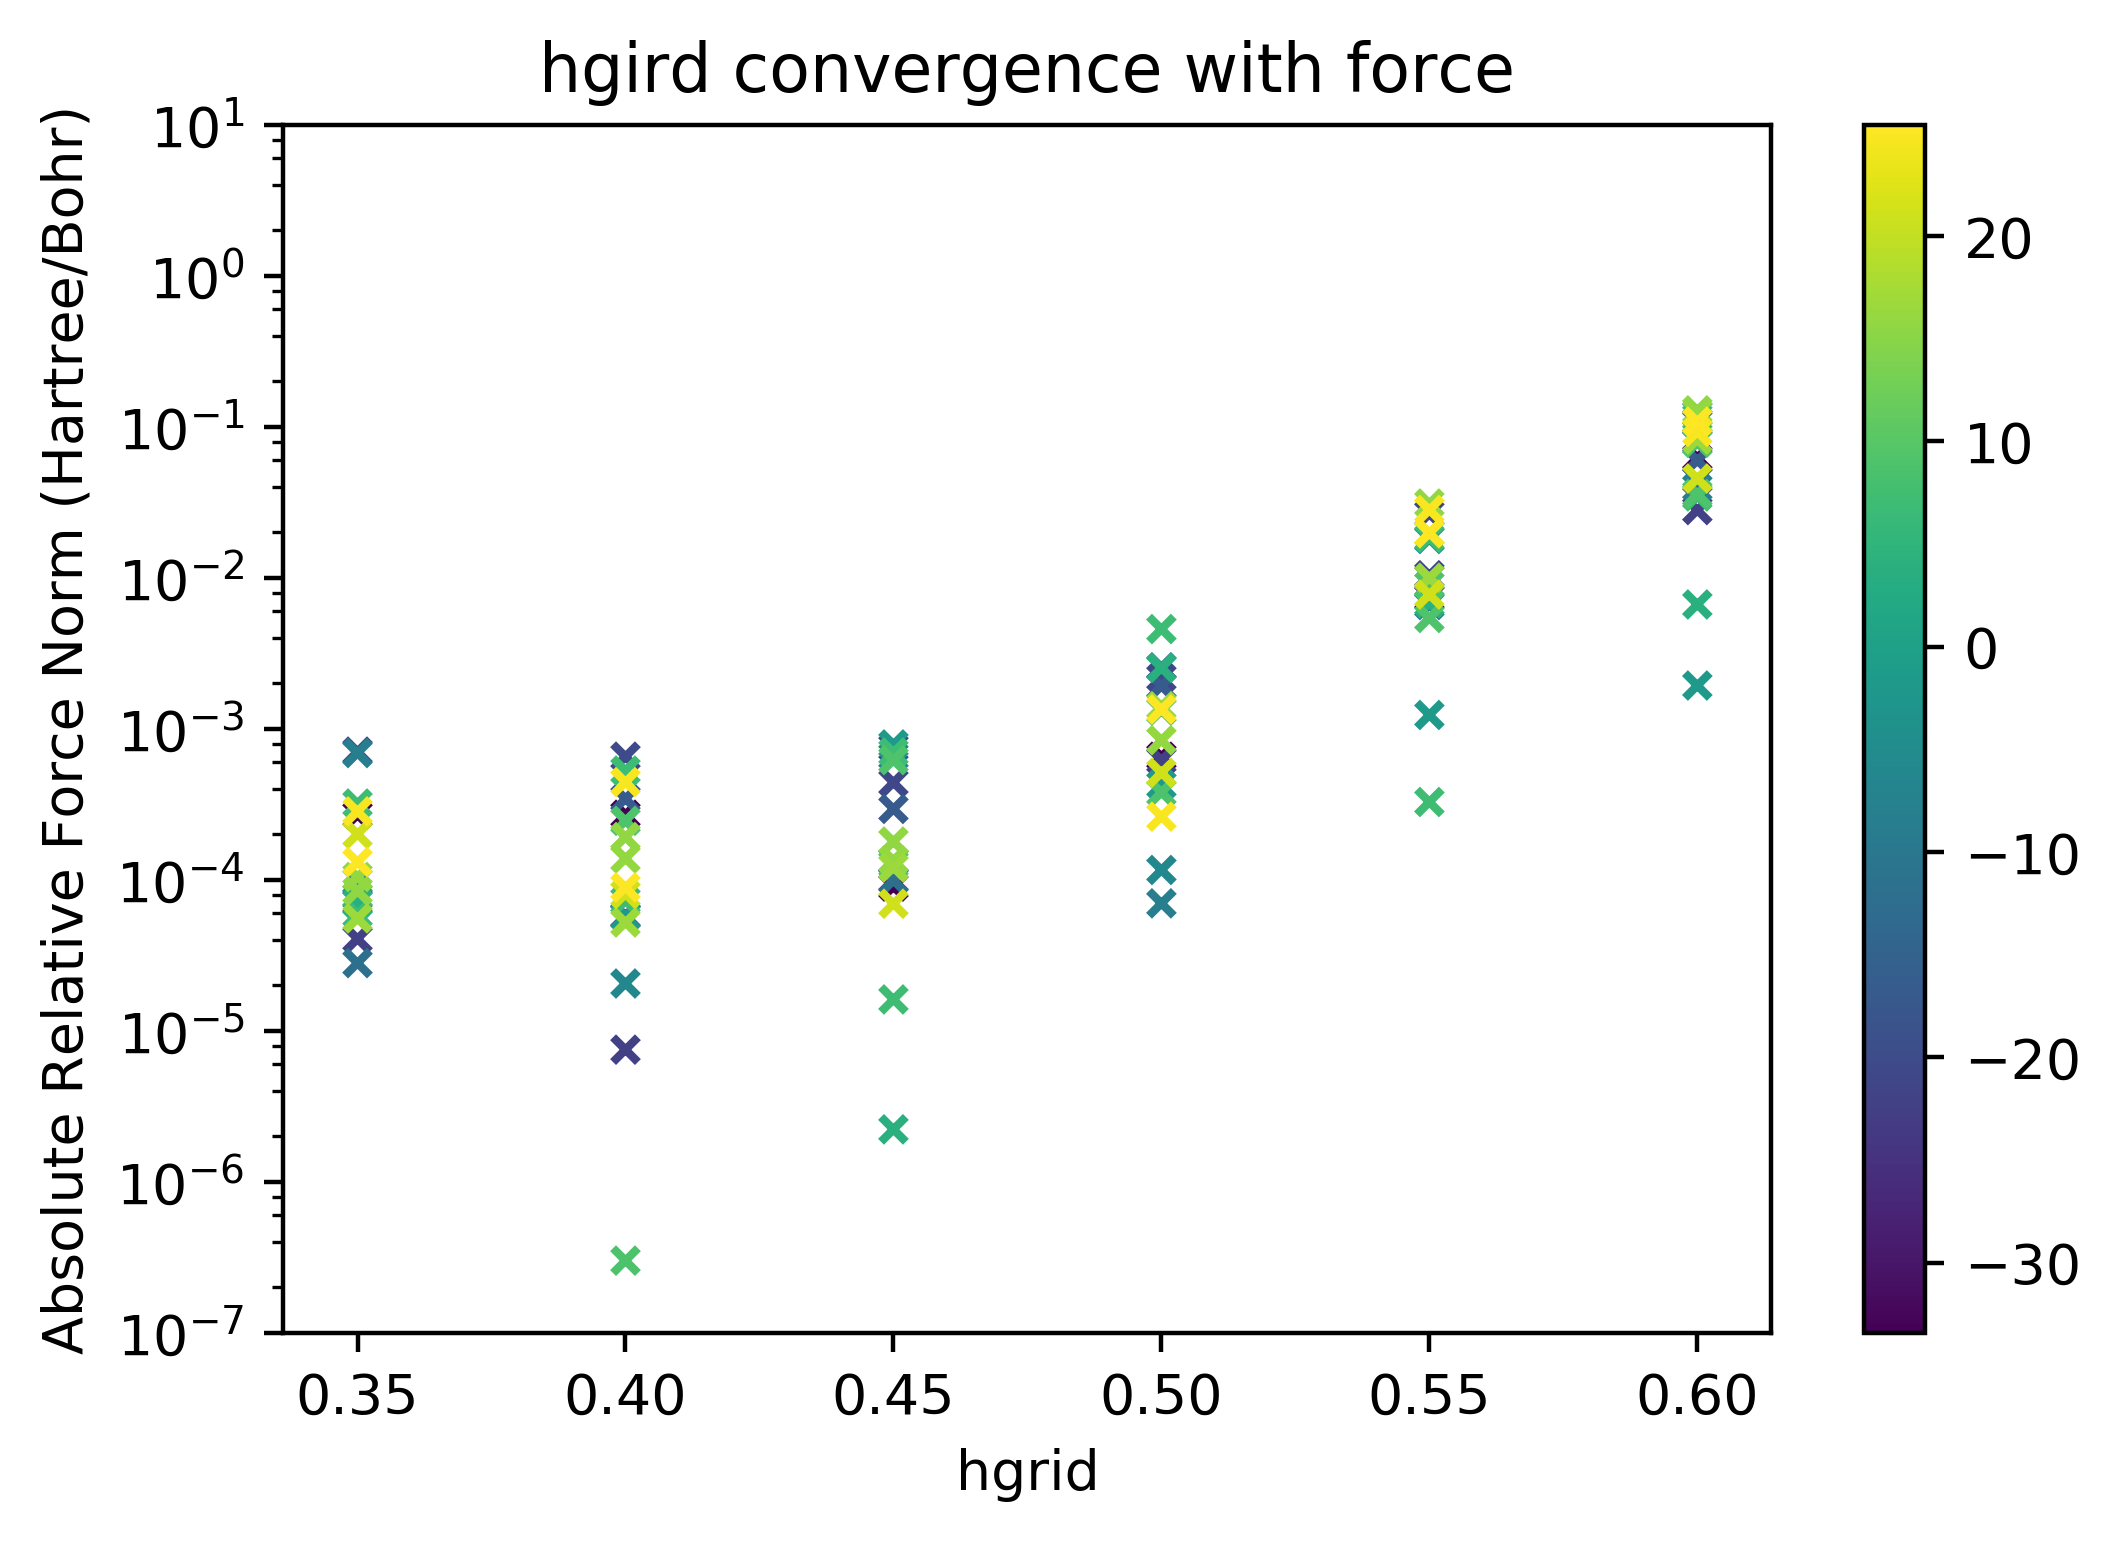

In [69]:
df_final.plot.scatter(x='hgrid',y='Absolute Relative Force Norm (Hartree/Bohr)',marker='x', alpha = 1, c=df_final['SYBA Score'],cmap="viridis", sharex=False)
plt.title('hgird convergence with force')

plt.yscale('log')
plt.ylim(0.0000001,10)

plt.show()